## Importing Required libraries

In [1]:
import os #Directory operations
from tkinter import filedialog #To Open File from local machine
import numpy as np #n-dim array operations
import pandas as pd #Reading data as Dataframe & Data accessing purpose
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data Visualization more effectively
from sklearn.model_selection import KFold, cross_val_score #To implement Cross-Validation and KFold validation
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set() #To override the styles of matplotlib
sns.set_style("darkgrid") #Styling the grid in the plot
sns.set_palette("magma") #Setting the palette style in the plot

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Module that reads in data from a source 

In [37]:
def read_data(filepath):
    if os.path.basename(filepath).endswith('.csv'):
        print('File read successfully!')
        return pd.read_csv(filepath, index_col=0)
    elif os.path.basename(filepath).endswith('.xlsx'):
        print('File read successfully!')
        return pd.read_excel(filepath)
    else:
        print('Invalid file format')

data = read_data(filedialog.askopenfilename(filetypes=(('Comma seperated file','.csv'),('Excel sheet','.xlsx'))))

File read successfully!


In [38]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [39]:
cop_data = data.copy()

In [40]:
data = cop_data.copy()

In [41]:
def convert_category(data):
    for c in data.columns:
        if data[c].dtypes == 'O' or data[c].dtypes == 'object':
            if len(data[c].value_counts()) <=10:
                lenc = LabelEncoder()
                data[c] = lenc.fit_transform(data[c])
                print(c , dict(zip(lenc.classes_, lenc.transform(lenc.classes_))))
            else:
                print('Large number of categories in %s ----- excluding converting to labels'%(c))
    return data
data = convert_category(data)

Category {'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}
Sex {'f': 0, 'm': 1}


In [42]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## 2. Selecting the data

In [26]:
def select_data(data, cols):
    columns = cols
    selected_data = data.loc[:, columns]
    return selected_data

selected_final_data = select_data(data, cols=['ALB'])

In [27]:
selected_final_data.head()

,ALB
1,38.5
2,38.5
3,46.9
4,43.2
5,39.2


## 3. Module that creates basic statistics

In [43]:
def basic_stats(data):
    return pd.concat([pd.DataFrame(data.dtypes, columns=['Data Type']).T,data.describe(exclude=['O'])],axis=0)
basic_stats(data)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Data Type,int32,int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,615,615,615,614,597,614,615,615,615,605,615,615,614
mean,0.386992,47.4081,0.613008,41.6202,68.2839,28.4508,34.7863,11.3967,8.19663,5.3681,81.2878,39.5332,72.0441
std,1.05229,10.0551,0.487458,5.78063,26.0283,25.4697,33.0907,19.6731,2.20566,1.13273,49.7562,54.6611,5.40264
min,0,19,0,14.9,11.3,0.9,10.6,0.8,1.42,1.43,8,4.5,44.8
25%,0,39,0,38.8,52.5,16.4,21.6,5.3,6.935,4.61,67,15.7,69.3
50%,0,47,1,41.95,66.2,23,25.9,7.3,8.26,5.3,77,23.3,72.2
75%,0,54,1,45.2,80.1,33.075,32.9,11.2,9.59,6.06,88,40.2,75.4
max,4,77,1,82.2,416.6,325.3,324,254,16.41,9.67,1079.1,650.9,90


## 4. Histogram on the selected data

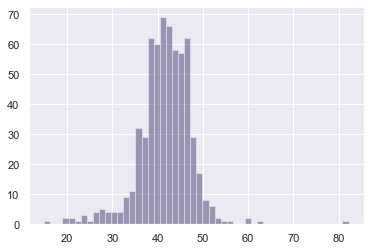

In [28]:
def plot_hist_on_selected_data(data, cols):
    columns = cols
    return sns.distplot(data[columns], bins=50, hist=True, kde=False)
#     data[columns].hist()

plot_hist_on_selected_data(selected_final_data, cols=selected_final_data.columns)

## 5. Return a Random Forest model

## Analysis

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


rfc = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,
    bootstrap=True,oob_score=False,n_jobs=None,random_state=21,verbose=0,warm_start=False,class_weight='balanced_subsample',
    ccp_alpha=0.0,    max_samples=None)

data.dropna(subset=['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']],data[['Category']], test_size=0.3, random_state=21 )

print('Train data shape',X_train.shape)
print('Test data shape',X_test.shape)

print('Training Class distribution\n', y_train.Category.value_counts(), '\nTesting Class distribution\n', y_test.Category.value_counts())
rfc.fit(X_train,y_train)
predicted = rfc.predict(X_test)
print('Confusion Matrix \n', confusion_matrix(predicted,y_test))

pd.DataFrame(classification_report(predicted,y_test, output_dict=True)).to_csv('Classification_report.csv')
print('Classifcation report written to Classification_report.csv in the working directory')
print('Feature Importance:\n', "['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']\n", rfc.feature_importances_)

Train data shape (417, 6)
Test data shape (179, 6)
Training Class distribution
 0    368
4     20
2     13
3     10
1      6
Name: Category, dtype: int64 
Testing Class distribution
 0    165
2      7
4      4
3      2
1      1
Name: Category, dtype: int64
Confusion Matrix 
 [[162   1   3   1   0]
 [  0   0   0   0   0]
 [  1   0   3   1   1]
 [  2   0   0   0   0]
 [  0   0   1   0   3]]
Classifcation report written to Classification_report.csv in the working directory
Feature Importance:
 ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']
 [0.05375612 0.14432123 0.28787684 0.22884819 0.13219462 0.15300299]


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split


rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=4,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,
    bootstrap=True,oob_score=False,n_jobs=None,random_state=21,verbose=0,warm_start=False,class_weight='balanced_subsample',
    ccp_alpha=0.0,    max_samples=None)

data.dropna(subset=['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL'], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']],data[['Category']], test_size=0.3, random_state=21 )

print('Train data shape',X_train.shape)
print('Test data shape',X_test.shape)

print('Training Class distribution\n', y_train.Category.value_counts(), '\nTesting Class distribution\n', y_test.Category.value_counts())
rfc.fit(X_train,y_train)
predicted = rfc.predict(X_test)
print('Confusion Matrix \n', confusion_matrix(predicted,y_test))

pd.DataFrame(classification_report(predicted,y_test, output_dict=True)).to_csv('Classification_report.csv')
print('Classifcation report written to Classification_report.csv in the working directory')
print('Feature Importance:\n', "['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']\n", rfc.feature_importances_)

Train data shape (417, 6)
Test data shape (179, 6)
Training Class distribution
 0    368
4     20
2     13
3     10
1      6
Name: Category, dtype: int64 
Testing Class distribution
 0    165
2      7
4      4
3      2
1      1
Name: Category, dtype: int64
Confusion Matrix 
 [[160   0   2   0   0]
 [  0   1   0   0   0]
 [  4   0   3   2   0]
 [  1   0   1   0   1]
 [  0   0   1   0   3]]
Classifcation report written to Classification_report.csv in the working directory
Feature Importance:
 ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']
 [0.07368256 0.16106951 0.290245   0.14450872 0.13131475 0.19917946]


## 6. 10-way Cross Validation

In [50]:
#Gini
def cross_validate(model, predictors, target, scoring, cv = 10):
    cv_score = cross_val_score(estimator=model, X = predictors, y = target, cv=cv, scoring=scoring)
    return cv_score #Returning 10-Fold  score

cross_validation_score = cross_validate(rfc, predictors=data[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']], target=data[['Category']], scoring='r2')
print('10-way cross Validation Score = ',cross_validation_score)
print('Mean 10-way cross Validation Score = ',np.mean(cross_validation_score))

10-way cross Validation Score =  [0.52471483 0.48669202 0.42356598 0.98314607 0.81460674 0.76404494
 0.93429844 0.08017817 0.60579065 0.60579065]
Mean 10-way cross Validation Score =  0.6222828482464389


In [47]:
#Entropy
def cross_validate(model, predictors, target, scoring, cv = 10):
    cv_score = cross_val_score(estimator=model, X = predictors, y = target, cv=cv, scoring=scoring)
    return cv_score #Returning 10-Fold  score

cross_validation_score = cross_validate(rfc, predictors=data[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']], target=data[['Category']], scoring='r2')
print('10-way cross Validation Score = ',cross_validation_score)
print('Mean 10-way cross Validation Score = ',np.mean(cross_validation_score))

10-way cross Validation Score =  [0.61977186 0.94296578 0.50833569 0.91573034 0.79775281 0.8988764
 0.47438753 0.51818857 0.58389013 0.95619896]
Mean 10-way cross Validation Score =  0.721609806308049


## 7.	Model that fits selected data to a line and prints out ax+b

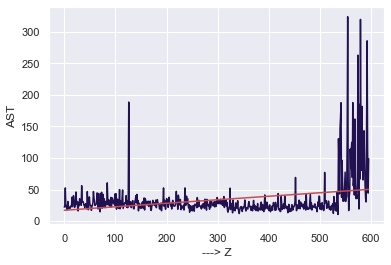

array([ 0.05559445, 17.17625375])

In [33]:
def line(Y,x_label,y_label): #Y is for Y axis values
    X = np.arange(0,len(Y),1)
    var2 = np.polyfit(X,Y,1)
    plt.plot(X,Y)
    plt.plot(X,var2[1]+ var2[0]*X, color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    return var2

line(Y = data['AST'].dropna(), x_label='---> Z', y_label='AST')

## 8. Histogram

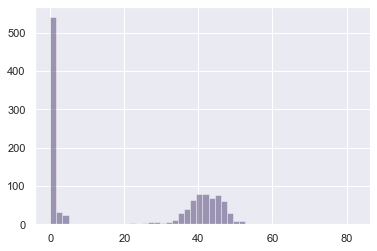

In [34]:
def display_histogram(data, cols):
    columns = cols
    return sns.distplot(data[columns], bins=50, hist=True, kde=False) #data[columns].hist(stacked=True)
display_histogram(data, cols=['Category', 'ALB'])

## 9.	Module that displays scatter plot

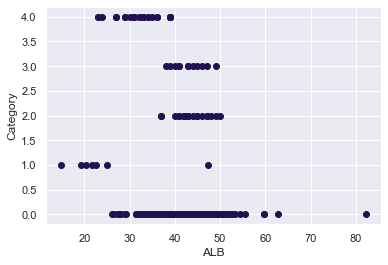

In [35]:
def scatter_plot_display(X,Y,x_label,y_label): # X is for X axis and Y is for Y axis values
    plt.scatter(X,Y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
scatter_plot_display(X = data['ALB'], Y = data['Category'], x_label='ALB', y_label='Category')

## 10. Heatmap

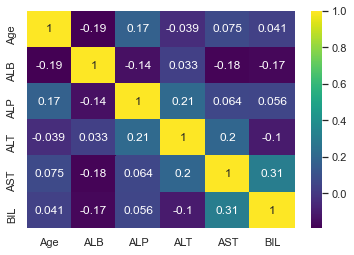

In [36]:
def display_heatmap(data):
#     return data[columns].hist()
    return sns.heatmap(data, annot=True, cmap='viridis')

display_heatmap(data[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL']].corr())

## Findings

In [ ]:
Data:
    Imbalanced
Model:
    Random Forest Classifier
    Pre processing / Creating Latent Variables: Standard/No
    Variations:
        Criterion: Gini
            
        Criterion: Entropy
            
    Feature importance:
        
    